<a href="https://colab.research.google.com/github/pauljohn99/ML-learnings/blob/main/lips.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
from google.colab import files
uploaded = files.upload()

Saving WIN_20221031_16_39_24_Pro.jpg to WIN_20221031_16_39_24_Pro.jpg


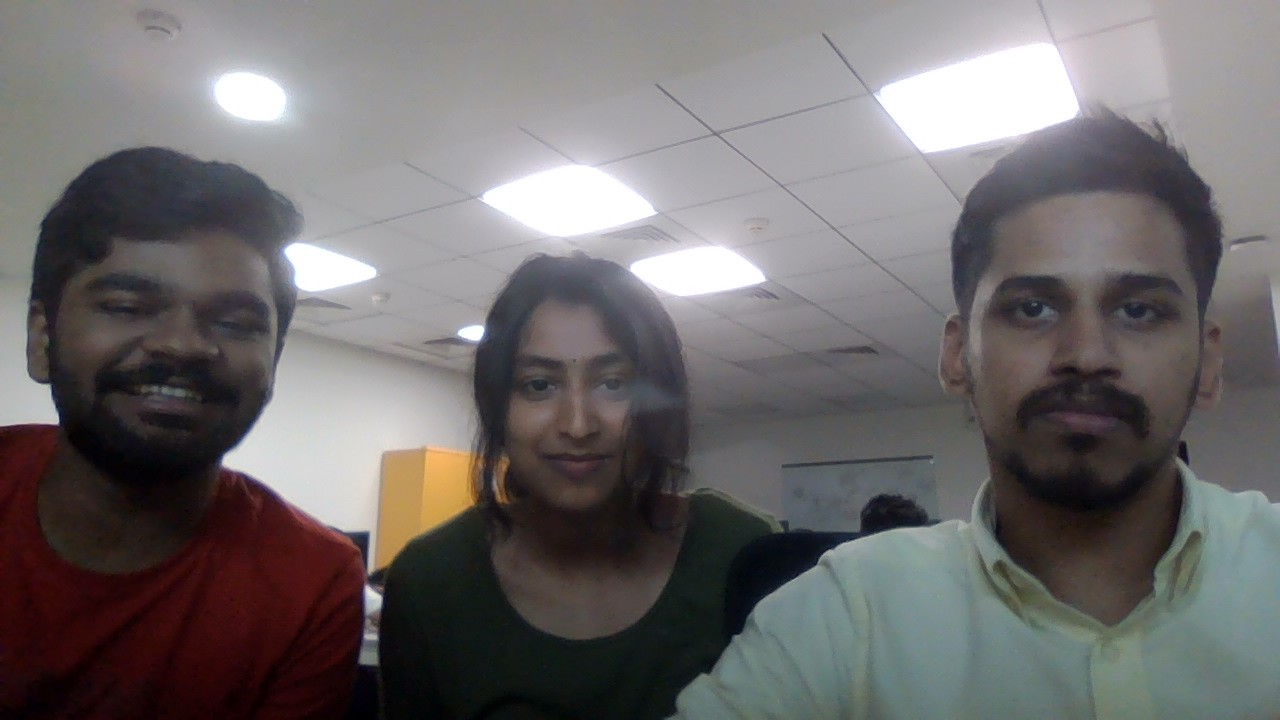

In [29]:
import cv2
from google.colab.patches import cv2_imshow

def show(image):
   cv2_imshow(image)

images = {name: cv2.imread(name) for name in uploaded.keys()}

for name, image in images.items():
  show(image)   

In [16]:
import mediapipe as mp
mp_face_mesh = mp.solutions.face_mesh

In [17]:
mp_drawing = mp.solutions.drawing_utils 
mp_drawing_styles = mp.solutions.drawing_styles

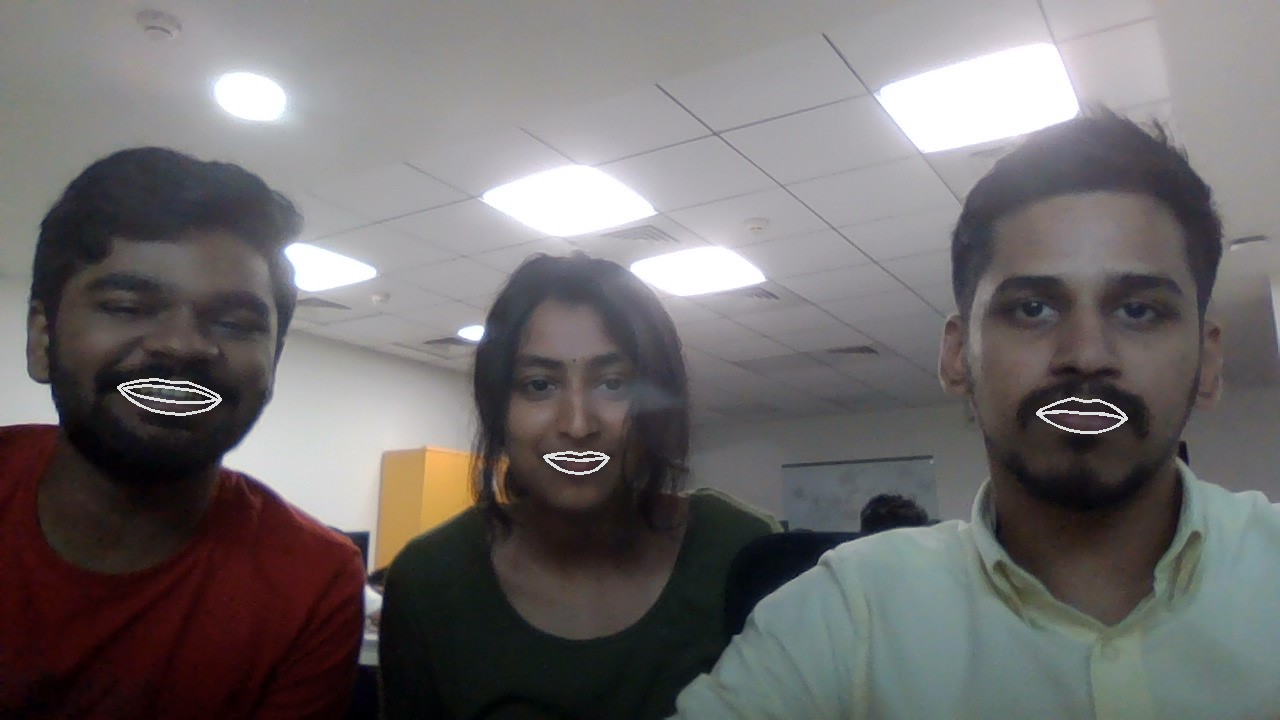

In [30]:
with mp_face_mesh.FaceMesh(
    refine_landmarks=True,
    max_num_faces=5,
    min_detection_confidence=0.5) as face_mesh:
  for name, image in images.items():
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    
    if not results.multi_face_landmarks:
      continue
    annotated_image = image.copy()
    for face_landmarks in results.multi_face_landmarks:
       mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_LIPS,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_contours_style())
  show(annotated_image)  